# Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = df.rename(columns={'default.payment.next.month': 'default',
                        'PAY_0': 'PAY_1'})

In [6]:
df.isnull().count()

ID           30000
LIMIT_BAL    30000
SEX          30000
EDUCATION    30000
MARRIAGE     30000
AGE          30000
PAY_1        30000
PAY_2        30000
PAY_3        30000
PAY_4        30000
PAY_5        30000
PAY_6        30000
BILL_AMT1    30000
BILL_AMT2    30000
BILL_AMT3    30000
BILL_AMT4    30000
BILL_AMT5    30000
BILL_AMT6    30000
PAY_AMT1     30000
PAY_AMT2     30000
PAY_AMT3     30000
PAY_AMT4     30000
PAY_AMT5     30000
PAY_AMT6     30000
default      30000
dtype: int64

In [7]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

# EDA

## Distribution of dependent feature

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

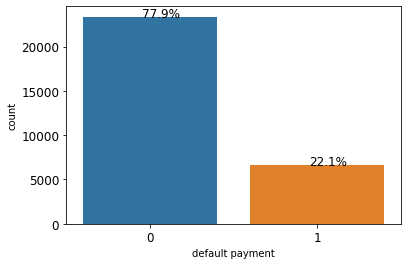

In [10]:
ax = sns.countplot(x='default', data=df)
plt.xticks(size = 12)
plt.xlabel('default payment')
plt.yticks(size = 12)
plt.ylabel('count')

without_hue(ax, df.default)

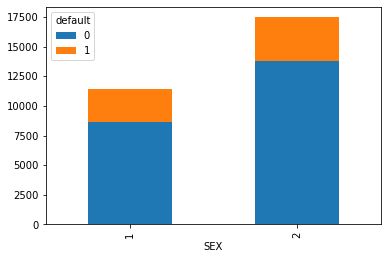

In [64]:
df.groupby(['SEX', 'default']).size().unstack(1).plot(kind='bar', stacked=True)

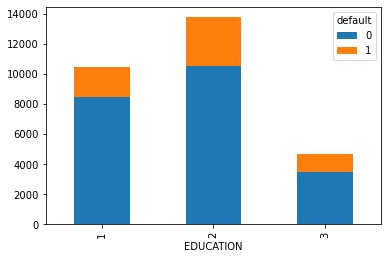

In [65]:
df.groupby(['EDUCATION', 'default']).size().unstack(1).plot(kind='bar', stacked=True)

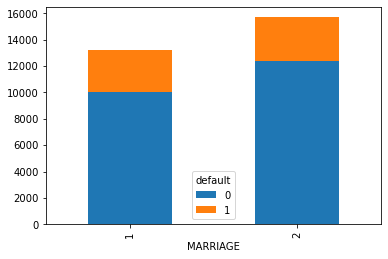

In [66]:
df.groupby(['MARRIAGE', 'default']).size().unstack(1).plot(kind='bar', stacked=True)

# Splitting the dataset

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [12]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [13]:
X = df.drop('default', axis=1)
y = df['default']

In [14]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 5983  5984  5985 ... 29997 29998 29999] Test: [   0    1    2 ... 6044 6045 6047]
Train: [    0     1     2 ... 29997 29998 29999] Test: [ 5983  5984  5985 ... 12048 12049 12050]
Train: [    0     1     2 ... 29997 29998 29999] Test: [11793 11794 11796 ... 18220 18222 18223]
Train: [    0     1     2 ... 29997 29998 29999] Test: [17312 17315 17316 ... 24072 24073 24074]
Train: [    0     1     2 ... 24072 24073 24074] Test: [23688 23691 23696 ... 29997 29998 29999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.77879167 0.22120833]
[0.77883333 0.22116667]


In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
## Dropping unknown values with insignificant count for EDUCATION
df.drop(df.loc[df['EDUCATION']==0].index, inplace=True)
df.drop(df.loc[df['EDUCATION']>3].index, inplace=True)

In [71]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
Name: EDUCATION, dtype: int64

In [18]:
## Dropping unknown values with insignificant count for MARRIAGE
df.drop(df.loc[df['MARRIAGE']==0].index, inplace=True)
df.drop(df.loc[df['MARRIAGE']>2].index, inplace=True)
df['MARRIAGE'].value_counts()

2    15738
1    13425
Name: MARRIAGE, dtype: int64

# Exploring Features

In [59]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

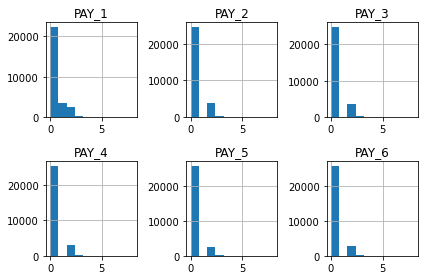

In [60]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# Detecting OUTLEIRS

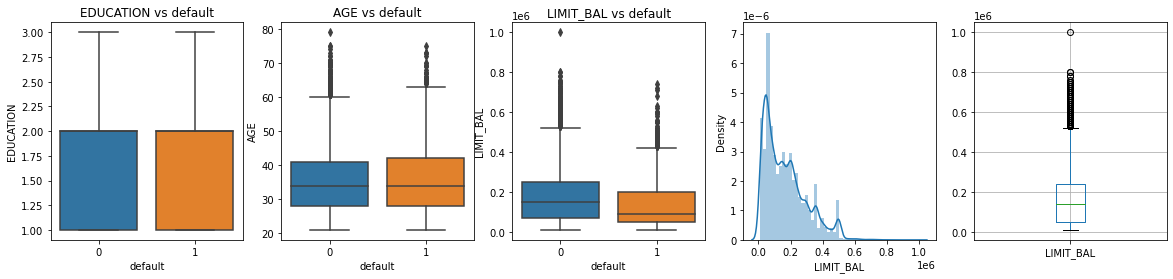

In [19]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

sns.boxplot(x="default", y="EDUCATION", data=df, ax=axes[0])
axes[0].set_title('EDUCATION vs default')

sns.boxplot(x="default", y="AGE", data=df, ax=axes[1])
axes[1].set_title('AGE vs default')

sns.boxplot(x="default", y="LIMIT_BAL", data=df, ax=axes[2])
axes[2].set_title('LIMIT_BAL vs default')

sns.distplot(df['LIMIT_BAL'], ax=axes[3])

df.boxplot(column='LIMIT_BAL', ax=axes[4]);

In [20]:
df['LIMIT_BAL'].describe()

count      29163.000000
mean      168093.943696
std       130079.785428
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

## Removing Outliers

### LIMIT_BAL

In [24]:
## LIMIT_BAL# # Dealing with outliers in positive skewed feature
IQR = df.LIMIT_BAL.quantile(0.75) - df.LIMIT_BAL.quantile(0.25)
lower_bridge = df['LIMIT_BAL'].quantile(0.25)-(IQR*3)
upper_bridge = df['LIMIT_BAL'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge), print(df['LIMIT_BAL'].mean())

outliers = [x for x in df['LIMIT_BAL'] if x < lower_bridge or x > upper_bridge]
print('LIMIT_BAL Outliers for default Cases: {}'.format(len(outliers)))
print('LIMIT_BAL outliers:{}'.format(outliers))

df = df.drop(df[(df['LIMIT_BAL'] > upper_bridge) | (df['LIMIT_BAL'] < lower_bridge)].index)
print('----' * 44)

-520000.0
810000.0
168093.9436957789
LIMIT_BAL Outliers for default Cases: 1
LIMIT_BAL outliers:[1000000.0]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### AGE

In [25]:
## 
IQR = df.AGE.quantile(0.75) - df.AGE.quantile(0.25)
lower_bridge = df['AGE'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['AGE'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge), print(df['AGE'].mean())

outliers = [x for x in df['AGE'] if x < lower_bridge or x > upper_bridge]
print('AGE Outliers for default Cases: {}'.format(len(outliers)))
print('AGE outliers:{}'.format(outliers))

df = df.drop(df[(df['AGE'] > upper_bridge) | (df['AGE'] < lower_bridge)].index)
print('----' * 44)

8.5
60.5
35.39016528358823
AGE Outliers for default Cases: 264
AGE outliers:[63, 75, 61, 73, 67, 67, 61, 62, 66, 70, 70, 63, 72, 61, 64, 61, 65, 65, 67, 71, 66, 62, 63, 66, 67, 62, 65, 62, 63, 66, 64, 66, 64, 63, 66, 65, 64, 63, 61, 61, 63, 67, 66, 69, 62, 62, 67, 70, 61, 71, 68, 64, 62, 62, 61, 61, 63, 62, 63, 64, 64, 61, 68, 61, 62, 65, 66, 63, 68, 70, 62, 62, 61, 65, 65, 61, 69, 63, 64, 61, 66, 67, 69, 69, 69, 70, 62, 66, 61, 67, 61, 61, 63, 62, 62, 64, 66, 61, 73, 63, 63, 61, 63, 62, 65, 63, 63, 69, 68, 62, 61, 62, 64, 61, 62, 61, 69, 61, 62, 64, 65, 66, 64, 66, 69, 69, 62, 65, 62, 64, 66, 67, 63, 61, 62, 64, 62, 61, 64, 62, 62, 61, 65, 66, 63, 69, 63, 63, 61, 62, 69, 64, 62, 66, 61, 65, 67, 61, 70, 63, 61, 61, 61, 62, 64, 62, 61, 66, 62, 64, 61, 62, 79, 66, 62, 61, 63, 62, 69, 66, 72, 62, 62, 70, 62, 69, 61, 64, 61, 62, 63, 65, 66, 61, 61, 63, 61, 64, 64, 67, 70, 70, 64, 68, 69, 67, 65, 63, 64, 65, 65, 62, 64, 62, 67, 61, 67, 65, 65, 61, 61, 61, 61, 63, 61, 61, 65, 66, 63, 66, 61,

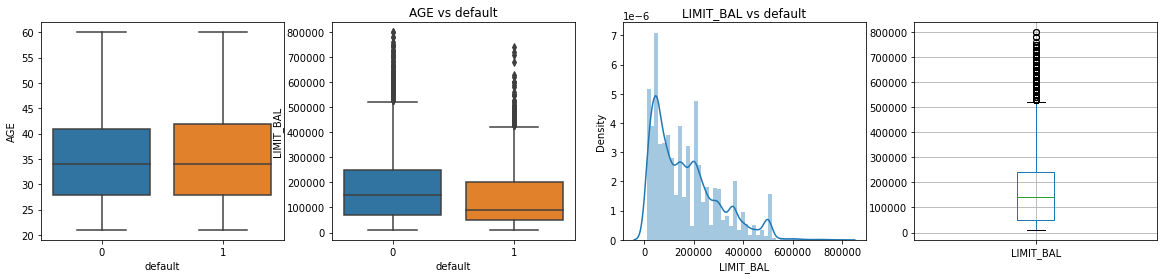

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="default", y="AGE", data=df, ax=axes[0])
axes[1].set_title('AGE vs default')

sns.boxplot(x="default", y="LIMIT_BAL", data=df, ax=axes[1])
axes[2].set_title('LIMIT_BAL vs default')

sns.distplot(df['LIMIT_BAL'], ax=axes[2])

df.boxplot(column='LIMIT_BAL', ax=axes[3]);

# Random UnderSampling

In [27]:
df['default'].value_counts()

0    22456
1     6442
Name: default, dtype: int64

In [28]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of default cases 6530 rows.
default_df = df.loc[df['default'] == 1]
non_default_df = df.loc[df['default'] == 0][:6530]

normal_distributed_df = pd.concat([default_df, non_default_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1100,1101,210000.0,2,3,2,46,1,2,0,0,...,17309.0,2310.0,241.0,13.0,17309.0,0.0,2310.0,241.0,4000.0,1
3637,3638,20000.0,1,2,1,34,0,0,0,0,...,10469.0,14272.0,15033.0,1300.0,1500.0,1415.0,4000.0,1000.0,1000.0,1
28065,28066,380000.0,2,2,1,30,2,0,0,0,...,136324.0,137929.0,114249.0,10382.0,8420.0,46777.0,4929.0,4249.0,5528.0,1
10164,10165,120000.0,2,3,2,50,0,-1,0,0,...,100637.0,79613.0,79286.0,125000.0,4065.0,4000.0,3000.0,3000.0,3000.0,1
3199,3200,180000.0,1,2,2,34,1,-2,-2,-2,...,89384.0,88315.0,84320.0,4600.0,4207.0,3500.0,4000.0,5000.0,602.0,1


In [29]:
new_df['default'].value_counts()

0    6530
1    6442
Name: default, dtype: int64

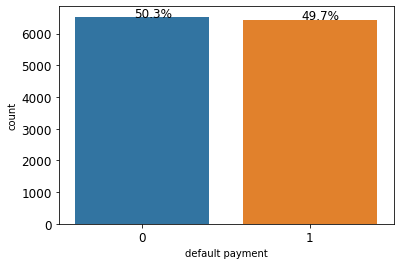

In [30]:
ax = sns.countplot(x='default', data=new_df)
plt.xticks(size = 12)
plt.xlabel('default payment')
plt.yticks(size = 12)
plt.ylabel('count')

without_hue(ax, new_df.default)

# Random OverSampling

In [80]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os = RandomOverSampler(1)
X_train_ns, y_train_ns = os.fit_sample(X_train,y_train)
print('the number of defaults before fit {}'.format(Counter(y_train)))
print('the number of defaults after fit {}'.format(Counter(y_train_ns)))

the number of defaults before fit Counter({0: 16806, 1: 4867})
the number of defaults after fit Counter({0: 16806, 1: 16806})


# Correlation

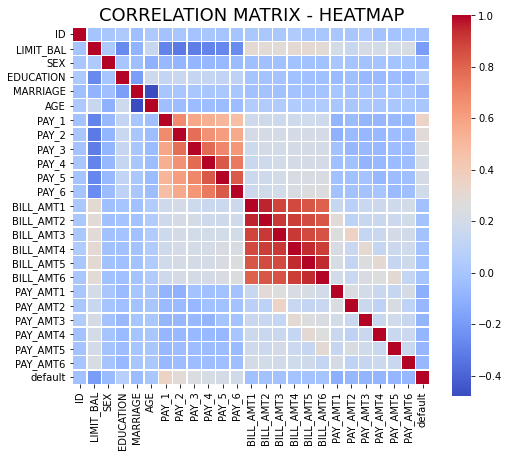

In [31]:
#  looking at correlations matrix, defined via Pearson function  
corr = new_df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);


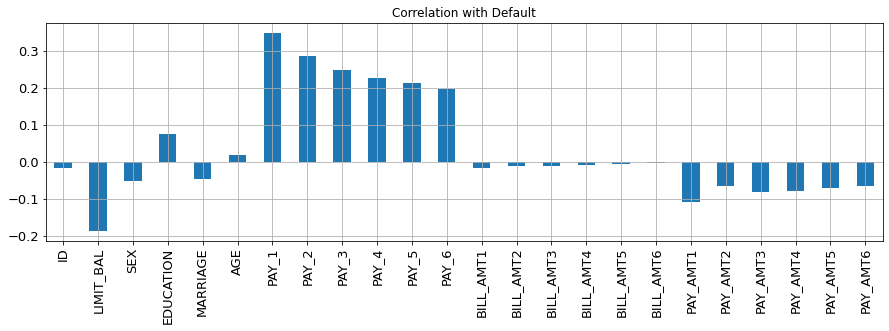

In [32]:
X.corrwith(new_df['default']).plot.bar(
        figsize = (15, 4), title = "Correlation with Default", fontsize = 13,
        rot = 90, grid = True);

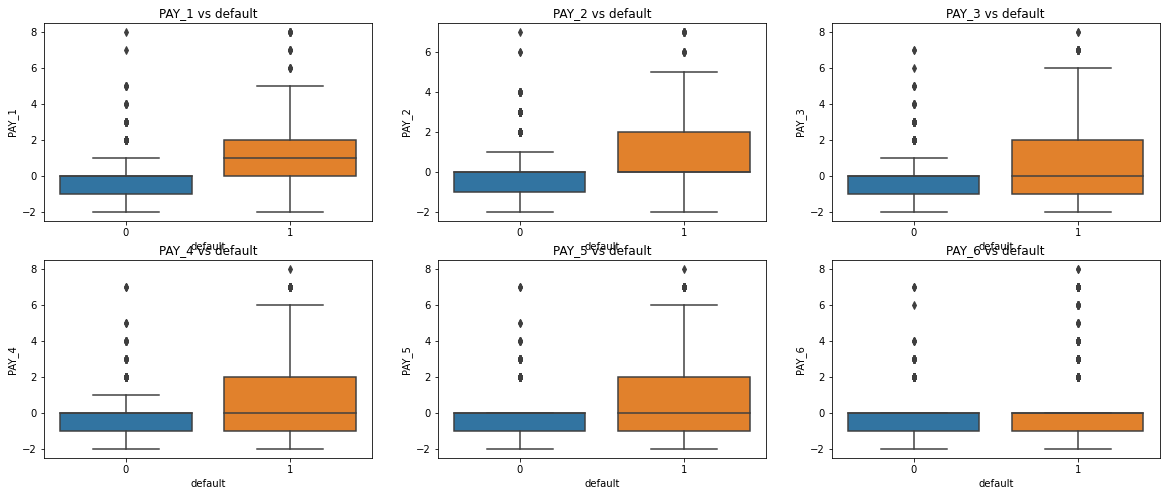

In [67]:
f, axs = plt.subplots(2,3, figsize=(20,8))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="default", y="PAY_1", data=new_df, ax=axs[0,0])
axs[0,0].set_title('PAY_1 vs default')

sns.boxplot(x="default", y="PAY_2", data=new_df,  ax=axs[0,1])
axs[0,1].set_title('PAY_2 vs default')


sns.boxplot(x="default", y="PAY_3", data=new_df,  ax=axs[0,2])
axs[0,2].set_title('PAY_3 vs default')


sns.boxplot(x="default", y="PAY_4", data=new_df,  ax=axs[1,0])
axs[1,0].set_title('PAY_4 vs default')

sns.boxplot(x="default", y="PAY_5", data=new_df,  ax=axs[1,1])
axs[1,1].set_title('PAY_5 vs default')

sns.boxplot(x="default", y="PAY_6", data=new_df,  ax=axs[1,2])
axs[1,2].set_title('PAY_6 vs default')

plt.show()

# Creating ML Models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [46]:
X = df.drop('default', axis=1)
y = df['default']

## Logisting reg

In [37]:
log_reg = LogisticRegression()
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
clf = GridSearchCV(log_reg, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [40]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5650    0]
 [1575    0]]
0.7820069204152249
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5650
           1       0.00      0.00      0.00      1575

    accuracy                           0.78      7225
   macro avg       0.39      0.50      0.44      7225
weighted avg       0.61      0.78      0.69      7225



## RandomForestClassifier

### Hyperparameter Tuning

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [55]:
# Create the random grid
param_dist = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20],
             'max_features': np.arange(3, 10)}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(DecisionTreeClassifier(), param_dist, cv = 5, scoring= 'accuracy')

shap_rf = rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 20, 'min_samples_split': 10}


Accuracy: 0.7649826989619377

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      5650
           1       0.47      0.65      0.55      1575

    accuracy                           0.76      7225
   macro avg       0.68      0.72      0.69      7225
weighted avg       0.80      0.76      0.78      7225


Average 5-Fold CV Score: 0.7148 , Standard deviation: 0.0078


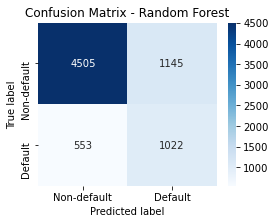

In [81]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth=9, 
                                     max_features=9, n_estimators=100, 
                                     random_state=0, max_leaf_nodes=20, min_samples_split=10)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

In [57]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(Ran, X)

,feat,score
6,"(P, A, Y, _, 1)",0.467833
7,"(P, A, Y, _, 2)",0.220342
8,"(P, A, Y, _, 3)",0.054092
9,"(P, A, Y, _, 4)",0.051269
10,"(P, A, Y, _, 5)",0.047493
18,"(P, A, Y, _, A, M, T, 1)",0.025036
11,"(P, A, Y, _, 6)",0.021113
12,"(B, I, L, L, _, A, M, T, 1)",0.019261
1,"(L, I, M, I, T, _, B, A, L)",0.018803
19,"(P, A, Y, _, A, M, T, 2)",0.017846


# Oversampling

In [72]:
from imblearn.over_sampling import RandomOverSampler

In [245]:
os = RandomOverSampler(0.7)
X_train_ns, y_train_ns = os.fit_sample(X_train,y_train)
print('the number of defaults before fit {}'.format(Counter(y_train)))
print('the number of defaults after fit {}'.format(Counter(y_train_ns)))

the number of defaults before fit Counter({0: 17004, 1: 4942})
the number of defaults after fit Counter({0: 17004, 1: 11902})


In [234]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [235]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5417  311]
 [ 985  603]]
0.8228540185893931
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5728
           1       0.66      0.38      0.48      1588

    accuracy                           0.82      7316
   macro avg       0.75      0.66      0.69      7316
weighted avg       0.81      0.82      0.80      7316



# SMOTETomek

In [236]:
from imblearn.combine import SMOTETomek

In [237]:
sm = SMOTETomek(0.8)
X_train_ns, y_train_ns = sm.fit_sample(X_train,y_train)
print('the number of defaults before fit {}'.format(Counter(y_train)))
print('the number of defaults after fit {}'.format(Counter(y_train_ns)))

the number of defaults before fit Counter({0: 17004, 1: 4942})
the number of defaults after fit Counter({0: 16451, 1: 13050})


In [238]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [240]:
param_dist = {'n_estimators': [50,100,150,200,250,300],
               "max_features": [1,2,3,4,5,6,7,8,9,10],
               'max_depth': [1,2,3,4,5,6,7,8,9,10],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

shap_rf = rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 10, 'max_depth': 4, 'criterion': 'entropy'}


Accuracy: 0.8053581191908147

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5728
           1       0.55      0.53      0.54      1588

    accuracy                           0.81      7316
   macro avg       0.71      0.71      0.71      7316
weighted avg       0.80      0.81      0.80      7316


Average 5-Fold CV Score: 0.8206 , Standard deviation: 0.0035


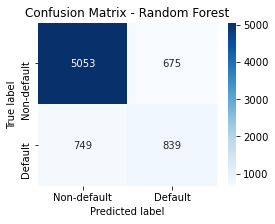

In [246]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 6, 
                                     max_features= 6, n_estimators= 100, 
                                     random_state=0)
Ran.fit(X_train_ns, y_train_ns)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

In [239]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5436  292]
 [ 988  600]]
0.8250410060142154
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5728
           1       0.67      0.38      0.48      1588

    accuracy                           0.83      7316
   macro avg       0.76      0.66      0.69      7316
weighted avg       0.81      0.83      0.81      7316

